In [3]:
!sudo apt-get install libkrb5-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libkrb5-dev is already the newest version (1.17-6ubuntu4.2).
libkrb5-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [ ]:
!pip install arcgis==1.8.4  torch==1.4.0  fastai==1.0.60 torchvision==0.5.0 fastprogress pandas

### 1. Necessary Imports

In [2]:
# Set env variable for ArcGIS to enable TensorFlow backend
%env ARCGIS_ENABLE_TF_BACKEND=1

env: ARCGIS_ENABLE_TF_BACKEND=1


In [5]:
import os
from pathlib import Path 

from arcgis.learn import prepare_data, FeatureClassifier

In [7]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. Download Dataset

In [8]:
filepath = r'/content/train.zip'

In [13]:
import zipfile
with zipfile.ZipFile(filepath, 'r') as zip_ref:
    zip_ref.extractall(Path(filepath).parent)

In [14]:
data_path = Path(os.path.join(os.path.splitext(filepath)[0]))

### 3. Filter out non RGB Images

In [15]:
from glob import glob
from PIL import Image

In [16]:
for image_filepath in glob(os.path.join(data_path, 'images', '**','*.jpg')):
    if Image.open(image_filepath).mode != 'RGB':
        os.remove(image_filepath)

### 4. Prepare data

In [17]:
data = prepare_data(
    path=data_path,
    dataset_type='Imagenet',
    batch_size=64,
    chip_size=300
)

### 5. Visualize a few samples from the training data

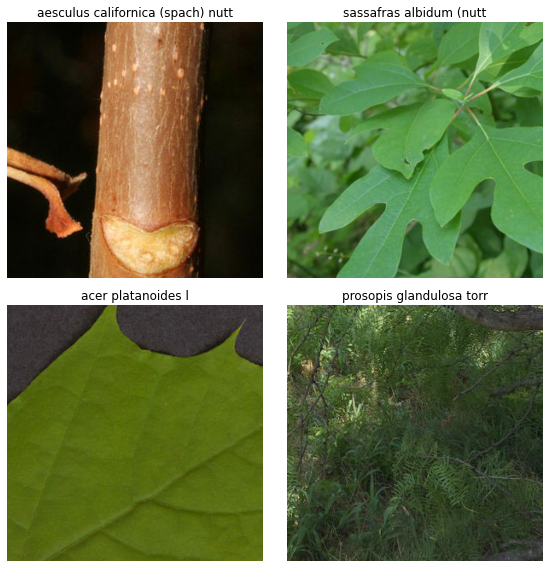

In [18]:
data.show_batch(rows=2)

### 6. Load model architecture

In [19]:
model = FeatureClassifier(data, backbone='MobileNetV2', backend='tensorflow')

9406464/9406464 [==============================] - 0s 0us/step


### 7. Find an optimal learning rate

In [23]:
lr = model.lr_find()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


KeyError: ignored

In [ ]:
model.fit(25, lr=0.00039810716)

In [ ]:
model.show_results(rows=4, thresh=0.2)

In [ ]:
model.save('Plant-identification-25-tflite', framework="tflite")